# Exploratory Data Analysis Summary

## 1. Overall Treatment vs. Control Performance
**Non-treated win rate:** 18.6%  
**Treated win rate:** 22.1%  
**Difference:** +3.6 percentage points  

Treated accounts appear to win more often, but this uplift is likely explained by **selection bias** — sales reps are more likely to act on stronger or higher-value opportunities.  
This motivates the need for causal or uplift modeling to measure true incremental impact.

---

## 2. Intent Distribution (Common Support Check)
The intent-to-buy distributions for treated and untreated accounts overlap substantially, with a mild peak around 0.45–0.55.  
This overlap confirms **common support**, meaning both groups span similar ranges of intent and are comparable in terms of sales readiness.

**Interpretation:**  
Group differences are not driven by missing intent coverage but likely by **deal size or account value**.

---

## 3. Feature Balance Across Groups

| Feature | Non-Treated | Treated | Δ |
|----------|-------------|----------|---|
| intent_affinity | 0.476 | 0.478 | +0.002 |
| trial_events_30 | 212.8 | 206.1 | –6.7 |
| trial_users_30 | 1.37 | 1.33 | –0.04 |
| touches_30 | 2.51 | 2.47 | –0.05 |
| responses_30 | 0.309 | 0.310 | +0.001 |
| acv_potential | 99,792 | 102,678 | +2,886 |
| employees | 2,005 | 2,066 | +61 |

**Summary:**  
Behavioral and engagement features are well-balanced between groups.  
Treated accounts are *slightly larger and higher in potential ACV*, consistent with sales teams favoring higher-value opportunities.

---

## 4. Win Rates by Segment

| Segment | Non-Treated | Treated | Lift |
|----------|-------------|----------|------|
| Enterprise (ENT) | 0.237 | 0.233 | –0.004 |
| Mid-Market (MM) | 0.195 | 0.203 | +0.008 |
| Small Business (SMB) | 0.172 | 0.225 | **+0.053** |

**Interpretation:**  
Enterprise customers already convert at high rates; additional actions add minimal incremental value.  
SMB accounts, however, show the largest uplift (+5 pp), nearly closing the gap with enterprise performance.  
Mid-market customers see modest improvements (~0.8 pp).

---

## 5. Win Rates by ACV Band

| ACV Band | Non-Treated | Treated | Lift |
|-----------|--------------|----------|------|
| Low | 0.169 | 0.215 | +4.6 pp |
| Med-Low | 0.179 | 0.188 | +0.9 pp |
| Med-High | 0.191 | 0.255 | **+6.4 pp** |
| High | 0.203 | 0.225 | +2.2 pp |

**Interpretation:**  
Conversion increases with ACV, but incremental lift varies.  
Low-value and **Med-High accounts benefit most from rep engagement**, while very large deals see smaller incremental changes.  
This suggests a **U-shaped responsiveness curve** — the best ROI for rep attention lies in small and mid-high value accounts.

---

## 6. Action-Level Performance

| Action Type | Win Rate | Lift vs. Control | Interpretation |
|--------------|-----------|------------------|----------------|
| PRICING_CONCESSION | 0.292 | +0.106 | Strong apparent lift but likely driven by late-stage bias; cost-heavy action. |
| CALL_OUTREACH | 0.239 | +0.053 | Scalable and impactful; strong core outreach driver. |
| LINKEDIN_TOUCH | 0.229 | +0.044 | Moderate lift; awareness-building channel. |
| DEMO_OFFER | 0.229 | +0.043 | High engagement and clear product value driver. |
| TECHNICAL_WORKSHOP | 0.206 | +0.021 | Effective for technical or PLG prospects. |
| EMAIL_SEQUENCE | 0.202 | +0.017 | Broad, low-cost coverage; modest impact. |
| EXEC_SPONSOR_OUTREACH | 0.164 | –0.022 | Overused in enterprise; little incremental gain. |

**Interpretation:**  
Direct, value-driven interactions — *Demo Offers*, *Calls*, and *Workshops* — produce the strongest win-rate improvements.  
Automated or passive channels add minimal incremental value but scale efficiently.  
Discounts and executive involvement should be applied strategically to avoid unnecessary cost.

---

## 7. Key Insights

1. **Selection Bias Exists:** Treated accounts are marginally larger and more valuable, inflating naive uplift estimates.  
2. **Common Support Achieved:** Intent distributions overlap, enabling valid causal modeling.  
3. **Segment & ACV Sensitivity:** SMB and Mid-High tiers show the largest marginal returns from sales action.  
4. **Action Effectiveness:** Demos and Calls drive meaningful engagement; low-touch actions provide cost-effective scale.  
5. **Strategic Focus:** Optimize rep capacity toward SMB and Mid-High ACV deals to maximize incremental revenue.


# Next Steps: From EDA to Modeling and Optimization

## 1. Objective
The exploratory analysis established a clear understanding of the data and revealed structured patterns in treatment, outcome, and bias.  
The next objective is to build predictive and causal models that estimate **incremental impact** — isolating true action effectiveness from baseline conversion probabilities.

---

## 2. Goals for the Modeling Phase
1. **Predict Baseline Win Probability:**  
   Train a supervised model (e.g., Gradient Boosting Classifier) to estimate the probability of winning *without treatment*, forming the counterfactual baseline.
2. **Estimate Incremental Uplift:**  
   Implement per-action T-learners to measure how each action changes win likelihood relative to the untreated control.
3. **Quantify Expected Value (EV):**  
   Convert uplift into financial terms using account-level ACV and action cost:  
   $$
   EV = (p_{\text{treated}} - p_{\text{control}}) \times ACV - Cost
   $$

4. **Recommend Optimal Actions:**  
   Rank accounts by expected value and select the best action under operational constraints (e.g., rep capacity, action budget).

---

## 3. Modeling Approach
- **Baseline Model:** Gradient Boosting Classifier or Logistic Regression for overall win propensity.  
- **Uplift Model:** T-Learner structure with separate models per action type; optional refinement using meta-learners (e.g., S-, X-, or DR-Learners).  
- **Validation:**  
  - Evaluate using AUC for classification accuracy.  
  - Use Qini or uplift curves to measure incremental lift quality.  
  - Compare model-derived uplift vs. raw observed lift from EDA.

---

## 4. Decision Intelligence Layer
Once uplift models are trained:
- **Compute expected incremental revenue** for each account–action pair.  
- **Optimize allocation** by prioritizing actions with the highest net expected value.  
- **Store results** in a `nba_recommendations` table for downstream consumption in analytics dashboards or APIs.

---

## 5. Next Deliverables
1. `nba/modeling/train_uplift.py` – train and evaluate per-action uplift models.  
2. `nba/decisioning/recommend_actions.py` – generate expected-value recommendations.  
3. Dashboard or visualization notebook to summarize performance and ROI by segment, ACV, and action type.

---

## 6. Key Success Metrics
- **Uplift Model AUC / Qini Coefficient**
- **Incremental Revenue vs. Baseline**
- **Rep Efficiency:** revenue lift per action or per cost unit.
- **Action Allocation Accuracy:** % of actions targeting the correct high-value accounts.

---

*This transition marks the move from exploratory insight to prescriptive intelligence — using data-driven modeling to determine which actions truly drive sales outcomes and where resources should be focused.*


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nba.warehouse.duckdb_client import connect

In [12]:
from IPython.display import Markdown, display
from pathlib import Path

display(Markdown(open("../docs/data_dictionary.txt").read()))

# Sales Next Best Action (NBA) Synthetic Dataset — Data Dictionary

## Table: raw_accounts
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Unique account identifier |
| segment | str | Account size segment: SMB, MM, ENT |
| industry | str | Industry category |
| region | str | Geographic region |
| employees | int | Estimated employee count |
| acv_potential | float | Potential annual contract value (ARR potential) |
| intent_affinity | float | Latent buying intent (0–1) |
| created_date | date | Date account was created in CRM |

---

## Table: raw_signals_daily
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Account reference |
| ds | date | Date of signal |
| web_visits | int | Daily website visit count |
| content_downloads | int | Daily content downloads |
| trial_active_users | int | Active trial users on that day |
| trial_events | int | In-app or trial usage events |

---

## Table: raw_touches
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Account reference |
| touch_date | date | Date of sales outreach |
| touch_type | str | Channel: EMAIL, CALL, LINKEDIN |
| responded | int | Whether the contact responded (1=yes, 0=no) |

---

## Table: raw_actions
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Account reference |
| as_of_date | date | Reference snapshot date for model training |
| treated | int | Whether the account received an NBA treatment (1=yes) |
| propensity_any | float | Model-simulated probability of being treated |
| action_type | str | Action performed (e.g., DEMO_OFFER, PRICING_CONCESSION, etc.) |
| action_date | date | Date action was applied |
| intent_score | float | Calculated intent score used for targeting logic |

---

## Table: raw_outcomes
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Account reference |
| as_of_date | date | Reference date |
| close_date | date | Simulated deal close date |
| won | int | Whether the deal was won (1=yes) |
| acv | float | Actualized ACV for the opportunity |
| p_win_no_action | float | Baseline win probability without treatment |
| p_win_observed | float | Win probability after observed action |
| realized_revenue | float | Simulated realized revenue from the opportunity |
| expected_revenue_observed | float | Expected revenue (p_win_observed × ACV) |

---

## Table: train_sales_nba
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Account reference |
| segment | str | Account segment |
| industry | str | Industry |
| employees | int | Employee count |
| acv_potential | float | Potential ARR |
| web_30 | float | Web visits in trailing 30 days |
| downloads_30 | float | Content downloads in trailing 30 days |
| trial_users_30 | float | Average trial active users (30d) |
| trial_events_30 | float | Total trial events (30d) |
| touches_30 | int | Sales touches in trailing 30 days |
| responses_30 | int | Total responses (30d) |
| action_type | str | Action assigned to account |
| action_cost | float | Simulated cost of action |
| won | int | Binary outcome (1=closed won) |
| realized_revenue | float | Observed realized revenue |
| y_won | int | Alias of won (target variable) |
| y_revenue | float | Target revenue metric |
| as_of_date | date | Reference date |

---

## Table: nba_recommendations
| Column | Type | Description |
|---------|------|-------------|
| account_id | int | Account reference |
| action | str | Recommended next best action |
| uplift | float | Predicted incremental win probability |
| expected_value | float | Expected incremental revenue net of cost |
| acv | float | Account-level ACV used in calculation |


#### Why this matters:
Establishing a clear data dictionary ensures feature transparency and domain understanding.
For real production systems, this also supports schema governance and downstream interpretability when integrating with BI or monitoring pipelines.

In [16]:
con = connect()
df = con.execute("SELECT * FROM train_sales_nba").fetchdf()

In [17]:
df.shape

(5000, 30)

In [18]:
df.head()

,account_id,segment,industry,region,employees,acv_potential,intent_affinity,created_date,web_30,downloads_30,...,close_date,won,acv,p_win_no_action,p_win_observed,realized_revenue,expected_revenue_observed,y_won,y_revenue,action_cost
0,1,MM,SaaS,EMEA,1722,121881,0.688397,2023-11-24,85,2,...,2026-04-01,1,121881.0,0.210591,0.210591,121881.0,25667.06,1,121881.0,0.0
1,2,SMB,EdTech,EMEA,99,3000,0.434754,2024-09-23,60,1,...,2026-04-01,0,3000.0,0.187724,0.187724,0.0,563.17,0,0.0,0.0
2,3,MM,Manufacturing,NA,1466,57224,0.644223,2023-05-02,94,2,...,2026-04-01,1,57224.0,0.209499,0.209499,57224.0,11988.39,1,57224.0,0.0
3,4,MM,SaaS,NA,1935,160311,0.641600,2024-01-25,84,3,...,2026-04-01,0,160311.0,0.211789,0.211789,0.0,33952.14,0,0.0,0.0
4,5,SMB,SaaS,NA,44,3000,0.718388,2025-07-14,94,2,...,2026-04-01,1,3000.0,0.196778,0.196778,3000.0,590.33,1,3000.0,0.0


## EDA
What are the strongest features that explain why wins are happening and how does sales behavior bias that signal?

In [49]:
df['won'].value_counts()

won
0    4035
1     965
Name: count, dtype: int64

In [25]:
# Win rate review:
win_rate = df['won'].mean()
print(f"Overall win rate:, {win_rate:.2%}")

Overall win rate:, 19.30%


In [50]:
df['treated'].value_counts()

treated
0    3935
1    1065
Name: count, dtype: int64

In [21]:
# Treatment rate review:
treat_rate = df['treated'].mean()
print(f"Treatment rate: {treat_rate:.2%}")

Treatment rate: 21.30%


In [38]:
df.groupby("treated")["won"].mean()

treated
0    0.185515
1    0.220657
Name: won, dtype: float64

Clear selection bias --> Treated individuals win at a higher rate, but are those individuals who received treatment at a high likelihood of being selected vs. the control group? Instincts here suggest that the comparison between groups is probably driven by the treatment group not being equivalent to the control group.

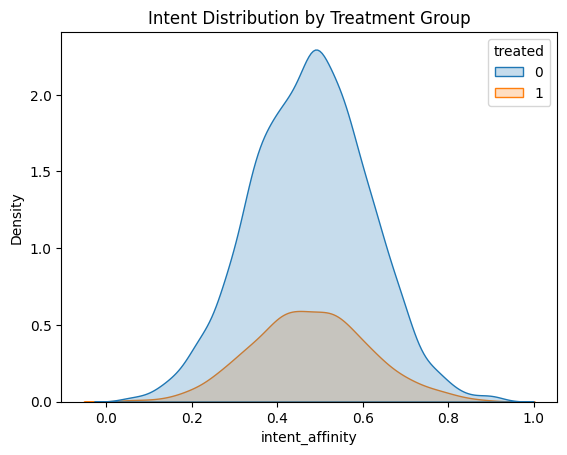

In [41]:
sns.kdeplot(data=df, x="intent_affinity", hue="treated", fill=True)
plt.title("Intent Distribution by Treatment Group")
plt.show()

In [45]:
df.groupby("treated")["intent_affinity"].mean()

treated
0    0.475689
1    0.477762
Name: intent_affinity, dtype: float64

Intent to buy seems to be evently distributed amongst the two groups. The bell skews a bit higher in the middle, but we don't see any left or right skewing, which is good. This is a good initial signal, but our treated group still has a slightly higher purchase intent.

In [ ]:
numeric_cols = [
    "intent_affinity", "trial_events_30", "trial_users_30",
    "touches_30", "responses_30", "acv_potential", "employees"
]

comp = (
    df.groupby("treated")[numeric_cols].mean().T.assign(diff=lambda d: d[1] - d[0])
    .rename(columns={0: "Non-Treated Mean", 1: "Treated Mean"})
)
comp


treated,Non-Treated Mean,Treated Mean,diff
intent_affinity,0.475689,0.477762,0.002073
trial_events_30,212.760864,206.092019,-6.668845
trial_users_30,1.365548,1.329045,-0.036503
touches_30,2.512834,2.465728,-0.047106
responses_30,0.309022,0.309859,0.000838
acv_potential,99792.293520,102677.967136,2885.673616
employees,2005.287421,2065.859155,60.571734


Behaviorally and intent-wise, groups are well balanced.

Economically, treated accounts tend to be a bit larger and higher-value.

In [48]:
def smd(x_treat, x_ctrl):
    return (x_treat.mean() - x_ctrl.mean()) / np.sqrt(0.5 * (x_treat.var() + x_ctrl.var()))

for col in ["intent_affinity","trial_events_30","trial_users_30",
            "touches_30","responses_30","acv_potential","employees"]:
    val = smd(df.loc[df.treated==1,col], df.loc[df.treated==0,col])
    print(f"{col:20s} {val: .3f}")


intent_affinity       0.015
trial_events_30      -0.047
trial_users_30       -0.040
touches_30           -0.029
responses_30          0.002
acv_potential         0.013
employees             0.012


All SMDs for our values are well below 0.1 so we're in good shape. Our initial hypothesis that reps are favoring certain accounts seems to be false, which is good! 

In [52]:
seg_treat = (
    df.groupby(["segment", "treated"])["won"]
      .mean()
      .reset_index()
      .pivot(index="segment", columns="treated", values="won")
      .rename(columns={0: "Non-Treated", 1: "Treated"})
)

seg_treat["Lift"] = seg_treat["Treated"] - seg_treat["Non-Treated"]
seg_treat


treated,Non-Treated,Treated,Lift
segment,,,
ENT,0.236607,0.232558,-0.004049
MM,0.195098,0.203125,0.008027
SMB,0.172274,0.225000,0.052726


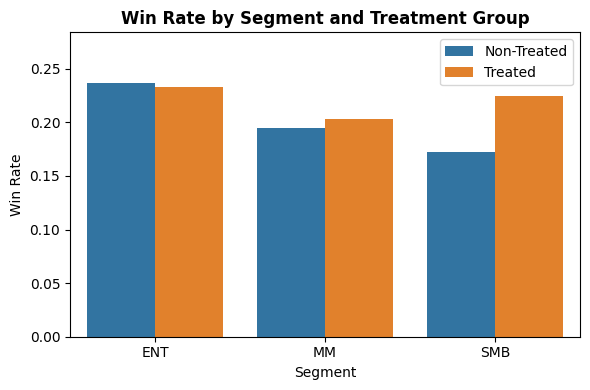

In [53]:
seg_plot = (
    df.groupby(["segment", "treated"])["won"]
      .mean()
      .reset_index()
      .assign(treated=lambda d: d["treated"].map({0:"Non-Treated",1:"Treated"}))
)

plt.figure(figsize=(6,4))
sns.barplot(data=seg_plot, x="segment", y="won", hue="treated")
plt.title("Win Rate by Segment and Treatment Group", weight="bold")
plt.ylabel("Win Rate")
plt.xlabel("Segment")
plt.ylim(0, seg_plot["won"].max()*1.2)
plt.legend(title="")
plt.tight_layout()
plt.show()

Small uplifts within smaller businesses vs. a very tiny drop for enterprise level customers. SMB see the largest uplift of just over 5%. Also key note, Enterprise customers have the highest overall conversion rate, but our treated small business users jump up to a similar level. 

The recommendation after seeing this information would likely be to re-allocate outreach resources to SMB customers as opposed to enterprise since intervention seems to have no effect.

In [54]:
df["acv_band"] = pd.qcut(df["acv_potential"], 4, labels=["Low","Med-Low","Med-High","High"])
acv_treat = (
    df.groupby(["acv_band","treated"])["won"]
      .mean()
      .reset_index()
      .pivot(index="acv_band", columns="treated", values="won")
)
acv_treat["Lift"] = acv_treat[1] - acv_treat[0]
acv_treat

/var/folders/vj/jx710m0d40g47l2z8d4j6_jm0000gr/T/ipykernel_37174/1135624651.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["acv_band","treated"])["won"]


treated,0,1,Lift
acv_band,,,
Low,0.169279,0.215017,0.045738
Med-Low,0.178894,0.188235,0.009341
Med-High,0.190716,0.254826,0.064110
High,0.202621,0.224806,0.022185


/var/folders/vj/jx710m0d40g47l2z8d4j6_jm0000gr/T/ipykernel_37174/3563165019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acv_plot = df.groupby(["acv_band","treated"])["won"].mean().reset_index()


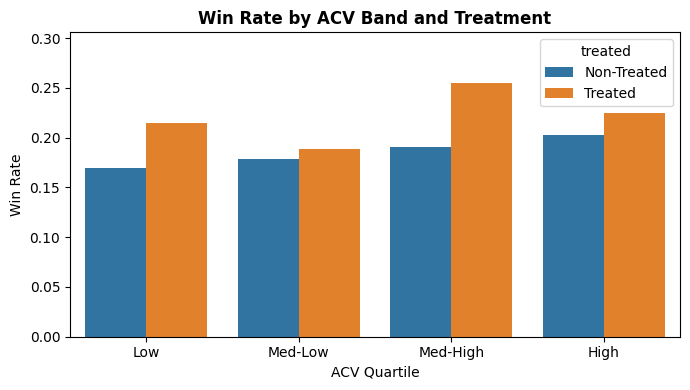

In [55]:
acv_plot = df.groupby(["acv_band","treated"])["won"].mean().reset_index()
acv_plot["treated"] = acv_plot["treated"].map({0:"Non-Treated",1:"Treated"})

plt.figure(figsize=(7,4))
sns.barplot(data=acv_plot, x="acv_band", y="won", hue="treated")
plt.title("Win Rate by ACV Band and Treatment", weight="bold")
plt.ylabel("Win Rate")
plt.xlabel("ACV Quartile")
plt.ylim(0, acv_plot["won"].max()*1.2)
plt.tight_layout()
plt.show()

Low- and Med-High-value deals benefit most from sales engagement.
Mid-Low and High bands show smaller lifts.

For very low-value accounts, sales effort increases confidence and commitment.

Mid-High accounts (not yet enterprise) appear to be the true “sweet spot”: enough revenue to justify attention, but still flexible to persuasion.

High-ACV enterprise deals have high baselines—sales actions yield marginal incremental impact.

This pattern suggests that if reps have limited bandwidth, targeting small and mid-high tiers delivers the largest relative lift per unit of cost.

In [56]:
# Basic summary of win rate by action type
action_summary = (
    df.groupby("action_type")["won"]
    .mean()
    .reset_index()
    .sort_values("won", ascending=False)
)

action_summary


,action_type,won
6,PRICING_CONCESSION,0.291667
1,CALL_OUTREACH,0.238806
5,LINKEDIN_TOUCH,0.229358
2,DEMO_OFFER,0.228856
7,TECHNICAL_WORKSHOP,0.205607
3,EMAIL_SEQUENCE,0.201987
0,0,0.185515
4,EXEC_SPONSOR_OUTREACH,0.164384


In [57]:
base_rate = df.loc[df.treated == 0, "won"].mean()

action_summary["lift_vs_control"] = action_summary["won"] - base_rate
action_summary["lift_pct"] = 100 * (action_summary["lift_vs_control"] / base_rate)
action_summary

,action_type,won,lift_vs_control,lift_pct
6,PRICING_CONCESSION,0.291667,0.106152,57.220320
1,CALL_OUTREACH,0.238806,0.053291,28.726232
5,LINKEDIN_TOUCH,0.229358,0.043843,23.633279
2,DEMO_OFFER,0.228856,0.043341,23.362639
7,TECHNICAL_WORKSHOP,0.205607,0.020093,10.830880
3,EMAIL_SEQUENCE,0.201987,0.016472,8.879162
0,0,0.185515,0.000000,0.000000
4,EXEC_SPONSOR_OUTREACH,0.164384,-0.021131,-11.390505


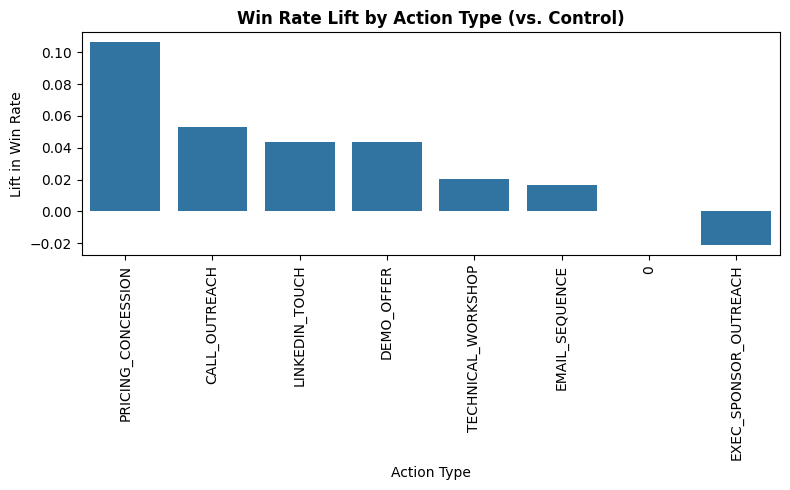

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=action_summary,
    x="action_type",
    y="lift_vs_control",
    order=action_summary.sort_values("lift_vs_control", ascending=False)["action_type"]
)
plt.title("Win Rate Lift by Action Type (vs. Control)", weight="bold")
plt.ylabel("Lift in Win Rate")
plt.xlabel("Action Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
action_costs = (
    df.groupby("action_type")[["action_cost", "acv_potential", "won"]]
    .agg({"action_cost":"mean", "acv_potential":"mean", "won":"mean"})
    .rename(columns={"won":"win_rate"})
    .reset_index()
)

action_costs["rev_per_win"] = action_costs["acv_potential"] * action_costs["win_rate"]
action_costs["rev_minus_cost"] = action_costs["rev_per_win"] - action_costs["action_cost"]
action_costs.sort_values("rev_minus_cost", ascending=False)

,action_type,action_cost,acv_potential,win_rate,rev_per_win,rev_minus_cost
6,PRICING_CONCESSION,100.0,151305.541667,0.291667,44130.782986,44030.782986
7,TECHNICAL_WORKSHOP,300.0,136209.710280,0.205607,28005.734824,27705.734824
4,EXEC_SPONSOR_OUTREACH,200.0,168456.520548,0.164384,27691.482830,27491.482830
2,DEMO_OFFER,50.0,112217.895522,0.228856,25681.707433,25631.707433
1,CALL_OUTREACH,25.0,98726.651741,0.238806,23576.513849,23551.513849
0,0,0.0,99792.293520,0.185515,18512.928658,18512.928658
5,LINKEDIN_TOUCH,10.0,67992.807339,0.229358,15594.680582,15584.680582
3,EMAIL_SEQUENCE,5.0,72103.314570,0.201987,14563.914532,14558.914532


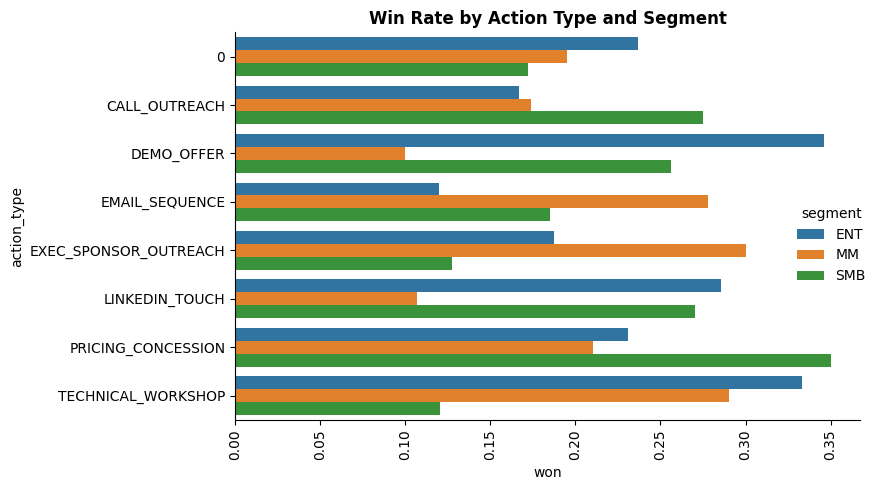

In [63]:
seg_action = (
    df.groupby(["segment","action_type"])["won"]
    .mean()
    .reset_index()
)

sns.catplot(
    data=seg_action, kind="bar",
    y="action_type", x="won", hue="segment",
    height=5, aspect=1.6
)
plt.title("Win Rate by Action Type and Segment", weight="bold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()